##  Pymaceuticals Observations and Insights 

* In this study, 248 mice identified with SCC tumor growth were treated through a variety of drug regimens. Over the course of 45 days, tumor development was observed and measured. 
* The number of data points for each Drug Regimen were all above 100 and the study had a near identical number of male and female mice.
* Out of four drugs of interest (Capomulin, Ramicane, Infubinol, and Ceftamin) only Infubinol had one outlier data point  and both Capomulin and Ramicane appeared to be equally effective in reducing the size of the tumors within the mice subjects. 
* Mouse weight correlated strongly (0.84) with average tumor volume.

## Dependencies and Starter Code

In [1]:
%matplotlib inline

!pip install scipy
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from scipy import stats
#%matplotlib notebook was causing graphs not to show in the right way so it was removed
#%matplotlib notebook

# Hide warning messages in notebook
import warnings
warnings.filterwarnings("ignore")

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

## MouseMeta Data

In [2]:
#check data before combining, clean data
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16



## Study Result Data

In [3]:
#check data before combining
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


## Datas Combined

In [4]:
# Combine the data into a single dataset merge left and right you are picking the column name that they Match. 
combined_data  = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")
mouse_metadata,
# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## .info() Checking columns for values and type 

In [5]:
# Review the information on the newly created merged dataframe
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
Mouse ID              1893 non-null object
Timepoint             1893 non-null int64
Tumor Volume (mm3)    1893 non-null float64
Metastatic Sites      1893 non-null int64
Drug Regimen          1893 non-null object
Sex                   1893 non-null object
Age_months            1893 non-null int64
Weight (g)            1893 non-null int64
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB



### Checked Duplicate Mouse ID

In [6]:
#checking for number of duplicates.It can be done in 2 ways:

# combined_data.duplicated(['Mouse ID']).value_counts()
len(combined_data['Mouse ID'].unique())

249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Checking the number of mice for any duplicates.
duplicate_mouseID = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouseID

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
# created a  filter 
# combined_data["Mouse ID"] == "g989"
# after we create a filter we apply it into our .loc dataframe 
combined_data.loc[combined_data["Mouse ID"] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


### Removed Duplicates

In [9]:
# Creating a New DataFrame and Dropping Duplicates
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Checking the number of mice in the clean DataFrame.
clean_data = combined_data.drop_duplicates(["Mouse ID", "Timepoint"], keep="last")
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary Statistics 

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation,and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
group_data1 = clean_data.groupby("Drug Regimen")

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
meanStat = round(group_data1['Tumor Volume (mm3)'].mean(),2)
medianStat = round(group_data1['Tumor Volume (mm3)'].median(),2)
varStat  = round(group_data1['Tumor Volume (mm3)'].var(),2)
stdStat  = round(group_data1['Tumor Volume (mm3)'].std(),2)
semStat = round(group_data1['Tumor Volume (mm3)'].sem(),2)


# Assemble the resulting series into a single summary dataframe.

summary_stats_df= pd.DataFrame({"Mean":meanStat,
                                "Median":medianStat,
                                "Variance":varStat,
                                " STD ":stdStat,
                                " SEM ":semStat})

summary_stats_df = summary_stats_df.sort_index()
summary_stats_df

#### is there a way to print title above chart? 'Tumor Volume (mm3)'

,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.38,50.78,43.22,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Summary Statistics  (using aggregation method .agg )

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
group_data = clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]

summary_stats_ag = round(group_data.agg(['mean','median', 'var','std','sem']),2)

# Instead of just printing summary_stats, I created a DataFrame to print a nicer table
summary_stats_ag_df = pd.DataFrame({"Mean Total Volume":summary_stats_ag['mean'],
                                    "Median Total Volume":summary_stats_ag['median'],
                                    "Total Volume Variance":summary_stats_ag['var'],
                                    "Tumor Volume Std. Dev. ":summary_stats_ag['std'],
                                    "Tumor Volume Std. Err.":summary_stats_ag['sem']})

summary_stats_ag_df = summary_stats_ag_df.sort_index()

summary_stats_ag_df

#Is there away to print these column names in different lines? not have them all in one line?

,Mean Total Volume,Median Total Volume,Total Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.38,50.78,43.22,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar Graph (using Pandas  )

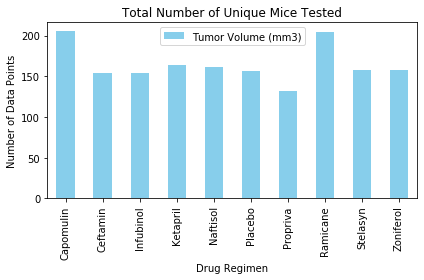

In [12]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

# Create a dataframe counting the total number of unique mice tested for each Drug Regimen
mice_tested = pd.DataFrame(group_data.nunique())

# Create a bar chart and label the title
panda_bar = mice_tested.plot.bar(title='Total Number of Unique Mice Tested', color='skyblue')

# Set the x_label and y_label using class methods
panda_bar.set_xlabel("Drug Regimen")
panda_bar.set_ylabel("Number of Data Points")
plt.tight_layout()


# Save the graph image
plt.savefig("Images/PandaBarChart.png")

# Display Graph
plt.show()

## Bar Graph (using Pyplot)

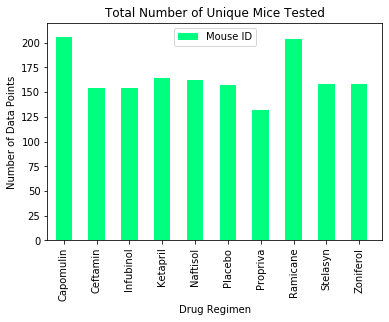

In [13]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

# Used the same groupby dataframe from above 'mice_tested'
# Set x axis and tick locations
x_axis = np.arange(len(mice_tested))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space

plt.figure(figsize=(6,4))

#changed the color from previous graph for better visualization and comparison of images
plt.bar(x_axis, mice_tested['Tumor Volume (mm3)'], color='springgreen', align="center", width = 0.50)

plt.xticks(tick_locations, list(mice_tested.index), rotation="vertical")

# Set x and y limits
plt.xlim(-0.5, len(x_axis)-0.3)
plt.ylim(0, 220)

# Set a Title and labels
plt.title("Total Number of Unique Mice Tested")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

##Definign column name
column_name = ["Mouse ID"]

# Printing graph legend on graph
plt.legend(column_name,loc="best")

# Save the graph image
plt.savefig("Images/PyplotBarChart.png")

# Display Graph
plt.show()

## Pie Charts

Generate a pie plot using both Pandas's DataFrame.plot() and Matplotlib's pyplot that shows the distribution of female or male mice in the study.

**NOTE:** These plots should look identical.

#### We need to create a DataFrame to group by 'Sex' column

In [15]:
gender_group = clean_data.groupby("Sex")
gender_df= pd.DataFrame(gender_group["Sex"].count())
gender_df

,Sex
Sex,
Female,930
Male,958


## Pie Graph(using pandas)

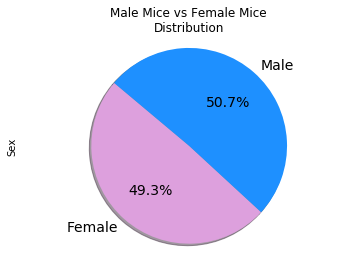

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Creating a Pie Chart using gender_group by "Sex". inside pie plot we set all our arguments
gender_df.plot.pie(y ='Sex', 
                   title ="Male Mice vs Female Mice\n" + "Distribution",
                   autopct="%1.1f%%", 
                   shadow=True,
                   startangle=140,
                   fontsize=14, 
                   colors=["plum", "dodgerblue"],
                   legend =False)

# Setting axis to equal in order to avoid an egg shaped pie chart
plt.axis("equal")
plt.fontweight="bold"
plt.savefig("Images/PandaPieChart.png")

# Display Graph
plt.show()

## Pie Graph (using pyplot)

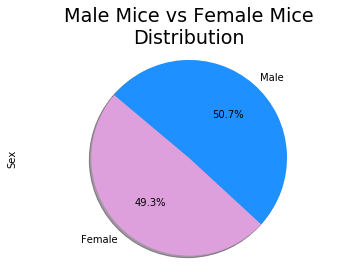

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# First need to get Labels for pie chart from the index values of the groupby dataframe
genders_label = list(gender_df.index.values)

# The values of each section of the pie chart
gender_counts = gender_df['Sex']

# The colors of each section of the pie chart
colors=["plum", "dodgerblue"]

# Now let's create a Pie Chart using above labels, colors
plt.pie(gender_counts, labels=genders_label, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140) 

# print the Title
plt.rcParams['font.size'] = 16
plt.title("Male Mice vs Female Mice\n" + "Distribution")
plt.ylabel("Sex")

# Setting axis to equal in order to avoid an egg shaped pie chart
plt.axis("equal")

#plt.fontweight="bold"
plt.savefig("Images/PyplotPieChart.png")

# Display Graph
plt.show()

## Quartiles, Outliers and Boxplots

* In this section I need to calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Then calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = clean_data.groupby(["Mouse ID"])['Timepoint'].max()
max_tumor = max_tumor.reset_index()
#max_tumor

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_combined  = pd.merge(max_tumor, clean_data, on=["Mouse ID", "Timepoint"], how="left")
max_combined.sort_index()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
four_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in four_treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor = max_combined.loc[max_combined["Drug Regimen"] == treatment, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_volume.append(tumor)
    
    #print(tumor_volume)
    #print(treatment)
    #print(type(tumor))
    #print(tumor)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor.quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    
    # Determine outliers using upper and lower bounds
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    outlier_treatment = [x for x in tumor  if (x > upper_bound) |(x < lower_bound)]
    print(f'{treatment} potential outliers: {outlier_treatment}')


Capomulin potential outliers: []
Ramicane potential outliers: []
Infubinol potential outliers: [36.321345799999996]
Ceftamin potential outliers: []


## Box Plot

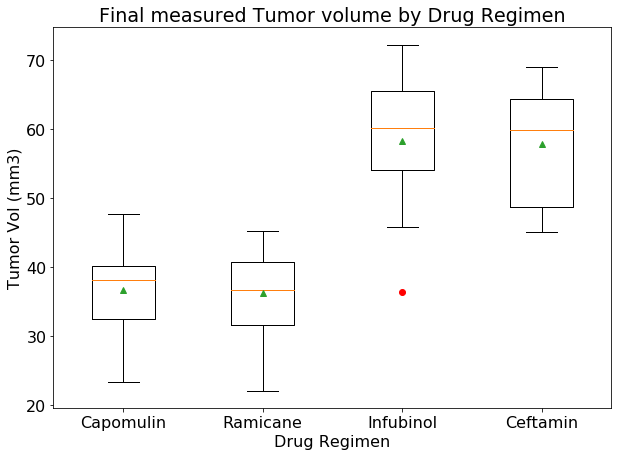

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax = plt.subplots(figsize=(10,7))
ax.set_title('Final measured Tumor volume by Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Vol (mm3)')
#plotting box and changed outlier symbol/color by setting symbol to rD
ax.boxplot(tumor_volume,labels = four_treatments, showmeans=True , sym='ro')
plt.xticks([1,2,3,4],four_treatments)

# Save the figure
plt.savefig("Images/BoxPlot.png")

# Display Graph
plt.show()

## Line Plot

* Generate a line plot of tumor volume vs. time point for a mouse treated with 'Capomulin'

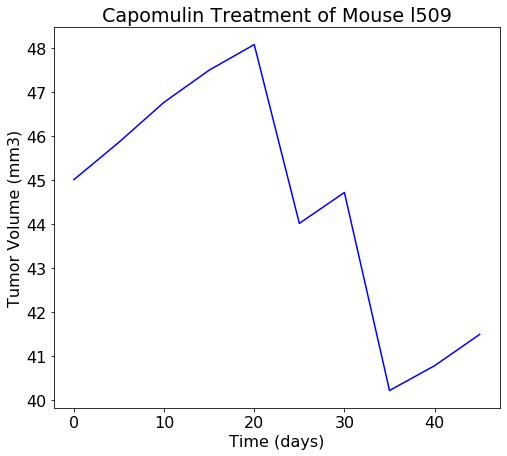

In [25]:
# Create a dataframe for only the Capomulin data
capomulin_data = clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin']

# Create a dataframe for only one mouse (l509) data
mouse_l509 = capomulin_data.loc[capomulin_data["Mouse ID"] == "l509"]

plt.plot(mouse_l509['Timepoint'], mouse_l509['Tumor Volume (mm3)'], color="blue", label="none")

#Add labels to X and Y axes :: Add title
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.rcParams["figure.figsize"] = [8,7]

# Save the graph image
plt.savefig("Images/lineplot.png")

# Display Graph
plt.show()


## Scatter Plot

* Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

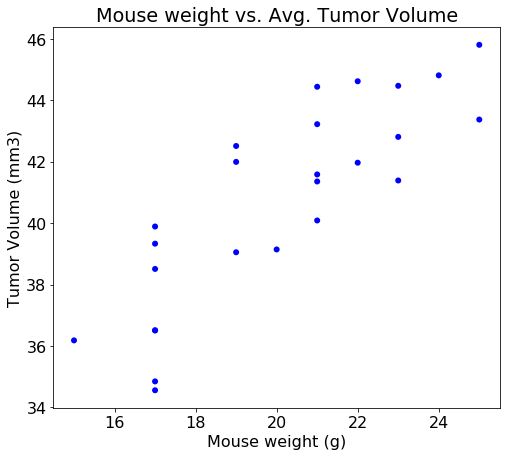

In [22]:
# Create a dataframe for only the Capomulin data
capomulin_data = clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin']

# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_drug_timepoint = capomulin_data.groupby(["Drug Regimen","Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"]

avg_tumor = grouped_drug_timepoint.mean()

# Convert to DataFrame
avg_tumor = avg_tumor.reset_index()

# Preview DataFrame
# avg_tumor

# Create scatter plot from the above dataframe
# Create a title, x label, and y label for our chart
plt.title("Mouse weight vs. Avg. Tumor Volume")
x_values = avg_tumor["Weight (g)"]
y_values = avg_tumor["Tumor Volume (mm3)"]
plt.scatter(x_values,y_values, alpha = 1, marker = 'o', facecolors = 'blue', edgecolors ='none')
plt.xlabel("Mouse weight (g)")
plt.ylabel('Tumor Volume (mm3)')

# Save the figure
plt.savefig("Images/Scatterplot.png")

# Display Graph
plt.show()

## Correlation Coefficient & Linear Regression

* Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment. Plot the linear regression model on top of the previous scatter plot.

In [23]:
# Calculate the correlation coefficient between "weight(g)" (my x_value) and "Tumor Volume (mm3)" (my y_value)
print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(x_values,y_values)[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.84


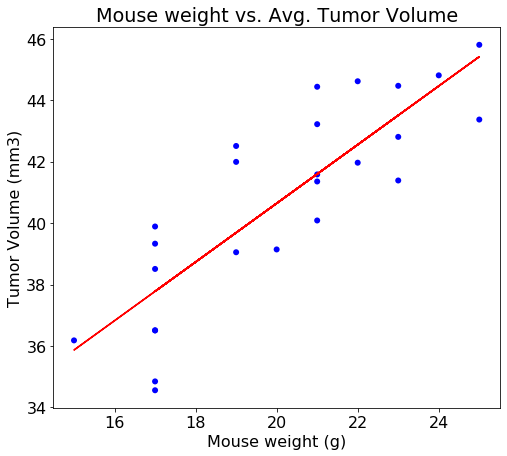

In [24]:
# Perform a linear regression on weight versus tumor volume
wt_slope, wt_intercept, wt_rvalue, wt_pvalue, wt_std_err = stats.linregress(x_values,y_values)

# Get regression values:create equation of line to calculate predicted treatment for Capomulin
wt_regress_values = wt_slope * x_values + wt_intercept

plt.title("Mouse weight vs. Avg. Tumor Volume")
x_values =avg_tumor["Weight (g)"]
y_values = avg_tumor["Tumor Volume (mm3)"]
plt.scatter(x_values,y_values, alpha = 1, marker = 'o', facecolors = 'blue', edgecolors ='none')
plt.plot(x_values, wt_regress_values,"-", color='red')
plt.xlabel("Mouse weight (g)")
plt.ylabel('Tumor Volume (mm3)')

# Save the figure
plt.savefig("Images/Scatterplot.png")

# Display Graph
plt.show()
